## Задание

1. Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями
2. Добавьте первые разности по стоимости доллара и евро к рублю
3. сделайте ее перрасчет (ресемплинг) в представление по неделям. 
4. Постройте модель предсказания 1-й точки от текущей (h=1).

5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Прочитаем базы по нефти, доллару и евро к рублю

In [5]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [33]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 11 columns):
Значение           2667 non-null float64
year               2667 non-null int64
month              2667 non-null int64
dayofmonth         2667 non-null int64
quarter            2667 non-null int64
dayofyear          2667 non-null int64
weekofyear         2667 non-null int64
dayofweek          2667 non-null int64
is_holiday         2667 non-null int64
is_prev_holiday    2667 non-null int64
is_next_holiday    2667 non-null int64
dtypes: float64(1), int64(10)
memory usage: 250.0 KB


In [6]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.head()

,curs
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [31]:
rub_doll.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 2010-09-01 to 2019-08-31
Data columns (total 1 columns):
curs    2228 non-null float64
dtypes: float64(1)
memory usage: 34.8+ KB


In [4]:
rub_e=pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.head()

,curs
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


In [32]:
rub_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 2010-09-01 to 2019-08-31
Data columns (total 1 columns):
curs    2228 non-null float64
dtypes: float64(1)
memory usage: 34.8+ KB


### Сделаем первые разности

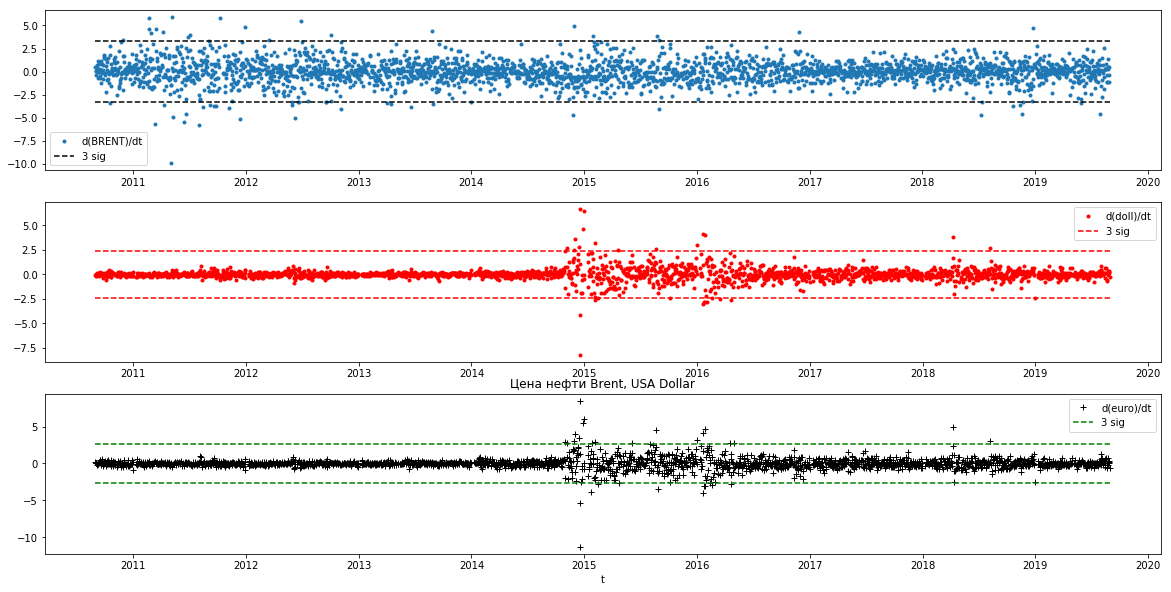

In [7]:
d_brent_data = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]
s_brent = np.std(d_brent_data)**0.5 *3

d_rub_doll = rub_doll['curs'].values[1:]- rub_doll['curs'].values[:-1]
s_rub = np.std(d_rub_doll)**0.5 *3

d_rub_e = rub_e['curs'].values[1:]- rub_e['curs'].values[:-1]
s_rube = np.std(d_rub_e)**0.5 *3

plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(brent_data.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')
plt.plot(brent_data.iloc[[0,-1]].index,[s_brent, s_brent],'--k',label ='3 sig')
plt.plot(brent_data.iloc[[0,-1]].index,[-s_brent, -s_brent],'--k')
plt.legend()

plt.subplot(3,1,2)
plt.plot(rub_doll.iloc[:-1].index,d_rub_doll,'.r', label='d(doll)/dt')
plt.plot(rub_doll.iloc[[0,-1]].index,[s_rub, s_rub],'--r',label ='3 sig')
plt.plot(rub_doll.iloc[[0,-1]].index,[-s_rub, -s_rub],'--r')
plt.legend()

plt.subplot(3,1,3)
plt.plot(rub_e.iloc[:-1].index,d_rub_e,'+k', label='d(euro)/dt')
plt.plot(rub_e.iloc[[0,-1]].index,[s_rube, s_rube],'--g',label ='3 sig')
plt.plot(rub_e.iloc[[0,-1]].index,[-s_rube, -s_rube],'--g')

plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

### Объединим все разности в один Dataframe d_brent_data

In [38]:
d_brent_data = pd.DataFrame(d_brent_data[:2227])

In [39]:
d_brent_data = d_brent_data.rename(columns={0: "Brent"})

In [40]:
d_rub_doll.size

2227

In [41]:
d_brent_data["Dollar"] = d_rub_doll

In [42]:
d_brent_data["Euro"] = d_rub_e

In [56]:
d_brent_data.index = pd.to_datetime(rub_doll['data'].values[:2227])

In [57]:
d_brent_data.head()

,Brent,Dollar,Euro
2010-09-01,0.52,-0.0668,0.1527
2010-09-02,-0.32,-0.1143,0.1247
2010-09-03,0.05,0.0064,0.0604
2010-09-04,0.01,-0.1151,0.1215
2010-09-07,0.24,0.1548,-0.1505


### Сделаем ресемплинг недельный

In [58]:
d_brent_data_w = d_brent_data.copy().resample('W').mean()
d_brent_data_w.head()

,Brent,Dollar,Euro
2010-09-05,0.065,-0.07245,0.114825
2010-09-12,0.356,0.02120,-0.029700
2010-09-19,0.012,0.05956,0.243620
2010-09-26,-0.098,-0.07380,0.136080
2010-10-03,0.174,-0.02318,0.150540


In [60]:
d_brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2227 entries, 2010-09-01 to 2019-08-30
Data columns (total 3 columns):
Brent     2227 non-null float64
Dollar    2227 non-null float64
Euro      2227 non-null float64
dtypes: float64(3)
memory usage: 69.6 KB


### Построим модель предсказания 1-й точки от текущей (h=1).

In [59]:
# Разделим на тестовые и тренировочные данные
# сделаем функцию
def split_data( data, split_date ):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

In [94]:
d_brent_data_w = d_brent_data_w.dropna()

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
scl_target=StandardScaler() 

h=1
target = d_brent_data_w["Brent"].values[h:].reshape((d_brent_data_w.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(461, 1)

In [140]:
scl_x=StandardScaler() 

X = d_brent_data_w.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(461, 3)

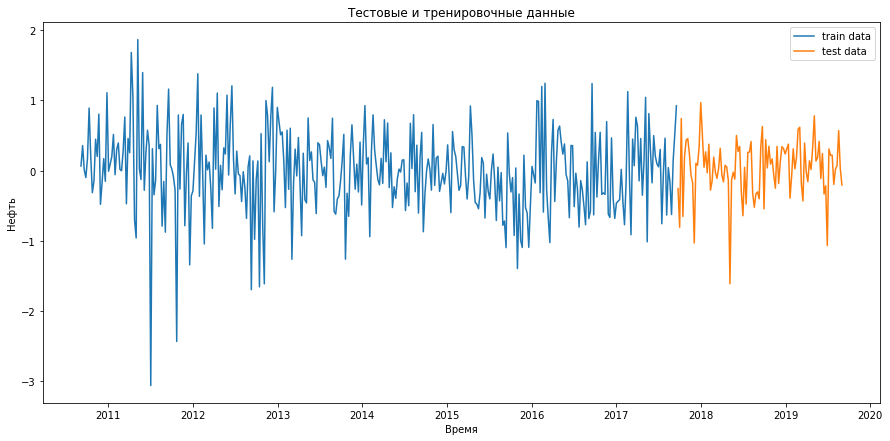

In [141]:
train, test = split_data( d_brent_data_w[-2000:], -100)

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Нефть')
plt.plot(train.index,train.iloc[:,0], label='train data' )
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [142]:
model_g = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)

In [143]:
X_train =X[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [144]:
model_g.fit(X_train, y_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=15, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

### Посмотрим тесты

In [145]:
y_test_pred_g = model_g.predict(X_test)

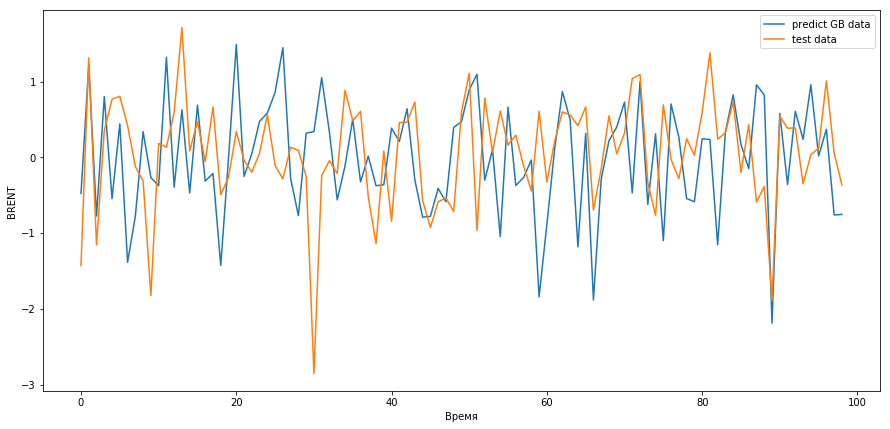

In [148]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g, label='predict GB data' )
plt.plot(y_test, label='test data')

plt.legend()
plt.show()

In [149]:
y_pred_g = model_g.predict(X_train)

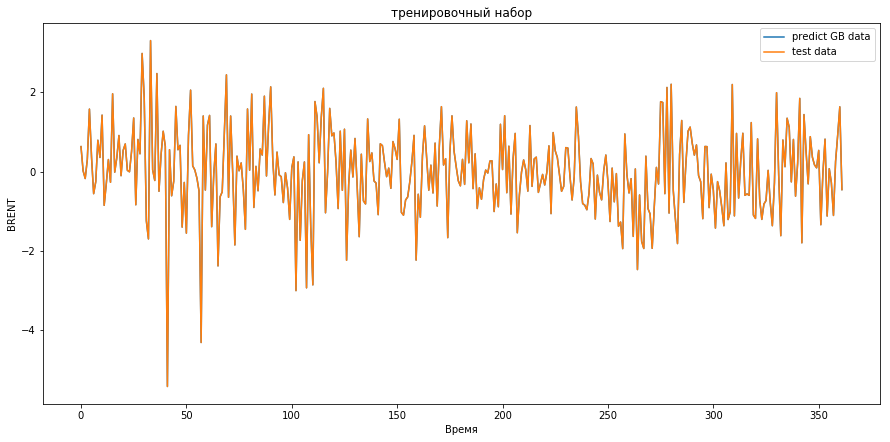

In [151]:
plt.figure( figsize=( 15, 7 ))

plt.title('тренировочный набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_pred_g, label='predict GB data' )
plt.plot(y_train, label='test data')

plt.legend()
plt.show()

**Оценки для сравнения моделей**

In [152]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [153]:
scl_target=StandardScaler() 
h=1
target = d_brent_data_w["Brent"].values[h:].reshape((d_brent_data_w.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(461, 1)

In [154]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.8182018632002291 
ошибка mae  :   0.6935076743644769 
оценка R2 :   -0.6442802845057243


In [155]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [156]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   291.82842970683976 %
